In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
r0 = 0.02
f = open('data/invasion_diagram_r0=%g.tsv'%r0, 'r')

D_m_list, beta_zeros, b_m_list = np.array([]), np.array([]), np.array([])
for line in f.readlines():
    if line[0] == '#':
        continue
        
    D_m_list = np.append(D_m_list, float(line.split('\t')[0]))
    beta_zeros = np.append(beta_zeros, float(line.split('\t')[1]))
    b_m_list = np.append(b_m_list, float(line.split('\t')[2]))
    
f.close()

beta_res = 2
D_res = 5*1e-6

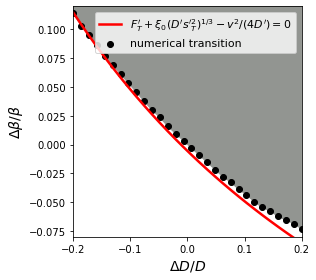

In [15]:
fig, ax = plt.subplots(figsize=(4.5,4))

dD_rel = (D_m_list-D_res)/D_res
ax.set_ylim(-0.08,0.12)
ax.set_xlim(dD_rel[0],dD_rel[-1])
ax.set_xlabel(r'$\Delta D / D$',fontsize=14)
ax.set_ylabel(r'$\Delta \beta / \beta$',fontsize=14)
ax.plot(dD_rel[:len(beta_zeros)], (b_m_list-beta_res)/beta_res, lw=2.5, c='r', label=r"$F_T' + \xi_0 (D' {s'}_T^2)^{1/3} - v^2/(4D') = 0$")
ax.fill_between(dD_rel[:len(beta_zeros)], (np.array(beta_zeros)-beta_res)/beta_res, np.ones(len(beta_zeros)), color='#929591')
ax.scatter(dD_rel[:len(beta_zeros)], (np.array(beta_zeros)-beta_res)/beta_res, color='k', label='numerical transition')

ax.legend(fontsize=11)
plt.tight_layout()
plt.savefig('plots/invasion_diagram_r0=%g.svg'%r0, dpi=200)